In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Fertilizers_Recommendation_\ System_For_Disease_\ Prediction.zip

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
path_train = 'Dataset Plant Disease/fruit-dataset/fruit-dataset/train'
path_test = 'Dataset Plant Disease/fruit-dataset/fruit-dataset/test'

In [6]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 6)                 906       
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [11]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 87s 382ms/step - loss: 1.0773 - accuracy: 0.8011 - val_loss: 0.2877 - val_accuracy: 0.8974
Epoch 2/10
225/225 [==============================] - 85s 377ms/step - loss: 0.2425 - accuracy: 0.9160 - val_loss: 0.1830 - val_accuracy: 0.9442
Epoch 3/10
225/225 [==============================] - 85s 378ms/step - loss: 0.1654 - accuracy: 0.9437 - val_loss: 0.1136 - val_accuracy: 0.9585
Epoch 4/10
225/225 [==============================] - 86s 381ms/step - loss: 0.1457 - accuracy: 0.9506 - val_loss: 0.1345 - val_accuracy: 0.9585
Epoch 5/10
225/225 [==============================] - 86s 380ms/step - loss: 0.1345 - accuracy: 0.9513 - val_loss: 0.1304 - val_accuracy: 0.9555
Epoch 6/10
225/225 [==============================] - 85s 376ms/step - loss: 0.0941 - accuracy: 0.9688 - val_loss: 0.0944 - val_accuracy: 0.9709
Epoch 7/10
225/225 [==============================] - 85s 376ms/step - loss: 0.1130 - accuracy: 0.9629 - val_loss: 0.0843 - val_ac

In [12]:
train_loss,train_acc = model.evaluate(x_train,steps = 16)
validation_loss,test_acc = model.evaluate(x_test,steps = 16)

16/16 [==============================] - 2s 112ms/step - loss: 0.1054 - accuracy: 0.9583


In [13]:
print('Train:%.3f,Test:%.3f'%(train_acc,test_acc))

Train:0.979,Test:0.958


In [14]:
model.save('fruitdata.h5')

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
model=load_model('fruitdata.h5')

In [17]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___healthy/1141dcab-cf2a-40e4-8b19-a33aa318f875___RS_HL 5689.JPG')

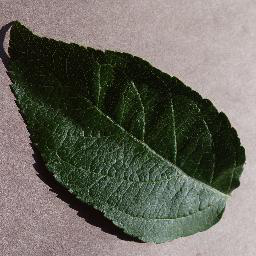

In [18]:
img

In [19]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___healthy/1141dcab-cf2a-40e4-8b19-a33aa318f875___RS_HL 5689.JPG',target_size = (128,128))

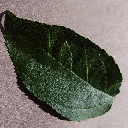

In [20]:
img

In [22]:
x = image.img_to_array(img)

In [23]:
x

array([[[143., 125., 125.],
        [139., 121., 121.],
        [143., 125., 125.],
        ...,
        [191., 180., 178.],
        [188., 177., 175.],
        [191., 180., 178.]],

       [[111.,  93.,  93.],
        [145., 127., 127.],
        [146., 128., 128.],
        ...,
        [196., 185., 183.],
        [191., 180., 178.],
        [187., 176., 174.]],

       [[136., 118., 118.],
        [154., 136., 136.],
        [111.,  93.,  93.],
        ...,
        [197., 186., 184.],
        [195., 184., 182.],
        [196., 185., 183.]],

       ...,

       [[104.,  85.,  87.],
        [159., 140., 142.],
        [171., 152., 154.],
        ...,
        [205., 195., 194.],
        [206., 196., 195.],
        [207., 197., 196.]],

       [[150., 131., 133.],
        [158., 139., 141.],
        [181., 162., 164.],
        ...,
        [212., 202., 201.],
        [193., 183., 182.],
        [204., 194., 193.]],

       [[161., 142., 144.],
        [185., 166., 168.],
        [161., 1

In [24]:
x = np.expand_dims(x,axis = 0)

In [25]:
x

array([[[[143., 125., 125.],
         [139., 121., 121.],
         [143., 125., 125.],
         ...,
         [191., 180., 178.],
         [188., 177., 175.],
         [191., 180., 178.]],

        [[111.,  93.,  93.],
         [145., 127., 127.],
         [146., 128., 128.],
         ...,
         [196., 185., 183.],
         [191., 180., 178.],
         [187., 176., 174.]],

        [[136., 118., 118.],
         [154., 136., 136.],
         [111.,  93.,  93.],
         ...,
         [197., 186., 184.],
         [195., 184., 182.],
         [196., 185., 183.]],

        ...,

        [[104.,  85.,  87.],
         [159., 140., 142.],
         [171., 152., 154.],
         ...,
         [205., 195., 194.],
         [206., 196., 195.],
         [207., 197., 196.]],

        [[150., 131., 133.],
         [158., 139., 141.],
         [181., 162., 164.],
         ...,
         [212., 202., 201.],
         [193., 183., 182.],
         [204., 194., 193.]],

        [[161., 142., 144.],
       